In [79]:
import pandas as pd
import numpy as np

In [80]:
ukD = pd.read_csv('adult.csv')
ukD.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [81]:
ukD.isin(['?']).sum()     #To check if '?' is present in any column 
ukD.replace(['?'],np.nan,inplace=True)   #To replace the value of '?' to NaN

In [82]:
ukD.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [83]:
ukD.dropna(inplace=True)
ukD.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [84]:
ukD.duplicated().sum()
ukD.drop_duplicates(inplace=True)

In [85]:
ukD.duplicated().sum()

0

In [86]:
#Label Encoding 

from sklearn.preprocessing import LabelEncoder

coder = LabelEncoder()

In [87]:
ukD['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [89]:
ukD['workclass'] = coder.fit_transform(ukD['workclass'])
ukD['workclass'].unique()

array([2, 1, 4, 0, 5, 3, 6], dtype=int64)

<Axes: ylabel='age'>

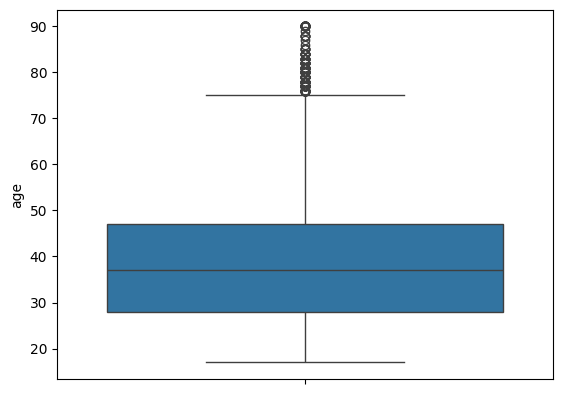

In [91]:
#Handling Outliers


import seaborn as sns
sns.boxplot(ukD['age'])

In [98]:
sorted_df = ukD.sort_values(by=['age'],ascending=True)

Q1 = np.percentile(ukD['age'],25)
Q3 = np.percentile(ukD['age'],75)

IQR = Q3-Q1
print(IQR)

19.0


In [99]:
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

In [100]:
print(lower)
print(upper)

-0.5
75.5


In [104]:
#Counting Outliers

outliers = []

for i in ukD['age']:
    if(i < lower or i > upper):
        outliers.append(i)

print(len(outliers))



268


In [106]:
#Replacing Outliers with Mean

mean = np.mean(ukD['age'])

for i in  outliers:
    ukD['age'] = np.where(ukD['age'] == i,mean,ukD['age'])

<Axes: ylabel='age'>

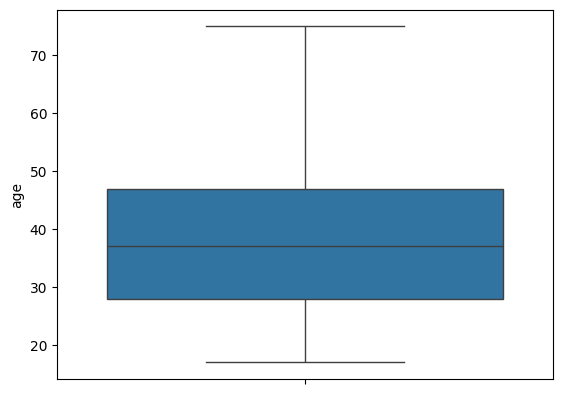

In [107]:
#BoxPlot Again

sns.boxplot(ukD['age'])

In [110]:
#Sampling (Just testing not real though)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler